# Monocular Depth Estimation Using U-Net and MobileNetV3 on Jetson TX2 NX Devices

This model aims for monocular depth estimation using a U-Net architecture with a MobileNetV3 as the encoder. The model is trained on the DIODE Indoor Dataset.

The model are built using the pytorch and then will be converted to ONNX then to a TensorRT engine for inference on the Jetson TX2 NX device.

The model is trained using the Adam optimizer with a learning rate of 0.0001 (Can be changed). The model is trained using the mean squared error loss function.

For more information on the model, please refer to the following paper: https://arxiv.org/pdf/2004.04572.pdf

An Aditional information can be accessed in the following link: https://github.com/alinstein/Depth_estimation, https://www.kaggle.com/code/muhammadhafil/monocular-depth-estimation and https://www.kaggle.com/code/harits/indoor-depth-estimation-u-net

The dataset used for training can be found in the following link: https://diode-dataset.org/ or https://www.kaggle.com/datasets/soumikrakshit/nyu-depth-v2

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import kornia
import cv2

# Main Library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.utils as utils
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import Model
from Model import Model

# Import Dataset
from DepthData import DepthDataset, Augmentation, ToTensor

In [2]:
# Check if gpu is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Dataset Preparation

In [3]:
train_csv = pd.read_csv('./data/nyu2_train.csv')
train_csv = train_csv.values.tolist()
train_csv = shuffle(train_csv)

# Visualize Depth Map

0 (640, 480) (640, 480)
1 (640, 480) (640, 480)
2 (640, 480) (640, 480)
3 (640, 480) (640, 480)


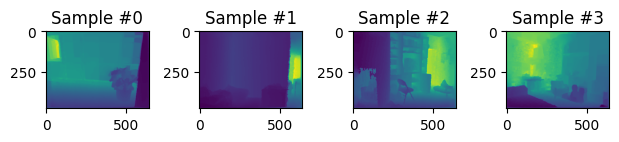

In [4]:
depth_data = DepthDataset(traincsv = train_csv, root_dir = './')
fig = plt.figure()
len(depth_data)

for i in range (len(depth_data)):
    sample = depth_data[i]
    print(i, sample['image'].size, sample['depth'].size)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    plt.imshow(sample['depth'])
    if i == 3:
        plt.show()
        break

# Model Architecture

This model uses a U-Net architecture with a MobileNetV3 as the encoder. The model will be trained on the NYU Depth V2 dataset.

SSIM is used as a loss function for this model. The model is trained using the Adam optimizer with a learning rate of 0.0001. The model is trained for 30 epochs.

In [5]:
def ssim(img1, img2, val_range, window_size=11, window=None, size_average=True, full=False):
    ssim = kornia.losses.SSIM(window_size=window_size, max_val=val_range, reduction='none')
    return ssim(img1, img2)